In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [3]:
IMAGE_NAME = "cow.jpeg"

In [4]:
def display_image(image):
  # Opencv2 normally shows in BGR, we want RGB so convert before displaying
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  # Remove the graph ticks
  plt.xticks([]), plt.yticks([]) 
  # Show the image
  plt.show()

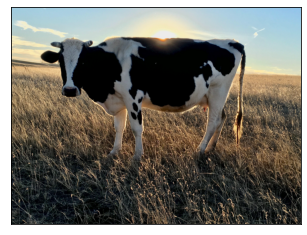

In [5]:
# Load the image
image = cv2.imread(IMAGE_NAME)
display_image(image)

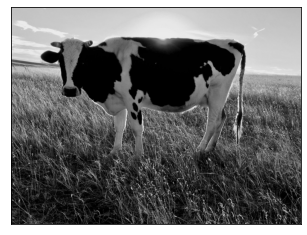

In [6]:
# Turn the image into greyscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image(gray_image)

In [7]:
pixel_colors = image.reshape((np.shape(image)[0]*np.shape(image)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [13]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_image)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

  
axis.scatter(h, s, v, facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

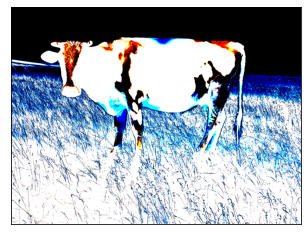

In [ ]:
ret, threshold_image = cv2.threshold(image, 110, 255, cv2.THRESH_BINARY_INV)
display_image(threshold_image)

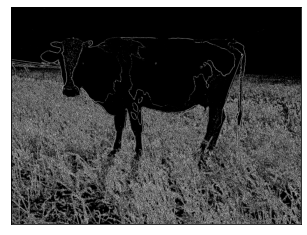

In [ ]:
new_tresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 12)
display_image(new_tresh)

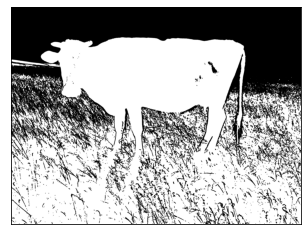

In [ ]:
# Kernel used for erosion
kernal_value = 5
kernel = np.ones((kernal_value, kernal_value), np.uint8) 

# Refine edges
erosion_image = cv2.erode(threshold_image, kernel, iterations = 1)

display_image(erosion_image)

In [17]:
# Open the image (erosion followed by dilation) to remove noise
opening_image = cv2.morphologyEx(erosion_image, cv2.MORPH_OPEN, kernel)
display_image(opening_image)

# Close the image (dilation followed by erosion) to close holes
closing_image = cv2.morphologyEx(opening_image, cv2.MORPH_CLOSE, kernel)
display_image(closing_image)

NameError: name 'erosion_image' is not defined

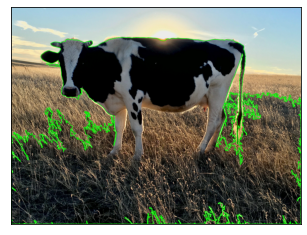

In [ ]:
# Find the contours
contours, hierarchy = cv2.findContours(closing_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# List to hold all areas
areas = [] 

for contour in contours:
  area = cv2.contourArea(contour)
  areas.append(area)

max_area = max(areas)
max_area_index = areas.index(max_area)

# Largest contour
max_contour = contours[max_area_index]
contour_image = cv2.drawContours(image, [max_contour], 0, (0, 255, 0), 5, maxLevel = 0)
display_image(image)